In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
train_df = pd.read_csv('train_users_2.csv')
test_df = pd.read_csv('test_users.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  first_device_type        62096 non-null  object 
 14  first_browser         

213451 users in train dataframe.
62096 users in test dataframe.

In [5]:
users_all = pd.concat((train_df, test_df), axis=0, ignore_index=True)

In [7]:
users_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       275547 non-null  object 
 1   date_account_created     275547 non-null  object 
 2   timestamp_first_active   275547 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   275547 non-null  object 
 5   age                      158681 non-null  float64
 6   signup_method            275547 non-null  object 
 7   signup_flow              275547 non-null  int64  
 8   language                 275547 non-null  object 
 9   affiliate_channel        275547 non-null  object 
 10  affiliate_provider       275547 non-null  object 
 11  first_affiliate_tracked  269462 non-null  object 
 12  signup_app               275547 non-null  object 
 13  first_device_type        275547 non-null  object 
 14  firs

In [8]:
users_all.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


## Missing value

In [6]:
users_all['gender'].replace('-unknown-', np.nan, inplace = True)

In [10]:
users_all.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                     129480
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
country_destination         62096
dtype: int64

There are 62096 missing value (around 33%) in date_first_booking is due to test set.

In [11]:
users_all['gender'].value_counts()

FEMALE    77524
MALE      68209
OTHER       334
Name: gender, dtype: int64

In [12]:
users_all['age'].describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [13]:
print(sum(users_all['age'] > 100))
print(sum(users_all['age'] < 18))

2690
188


In [7]:
users_all.loc[users_all['age'] > 100, 'age'] = np.nan
users_all.loc[users_all['age'] < 18, 'age'] = np.nan

## Duplicated value

In [15]:
users_all.duplicated().sum()

0

## Data Type Transform

In [8]:
categorical_features = [
    'gender',
    'signup_method',
    'language',
    'affiliate_channel',
    'affiliate_provider',
    'first_affiliate_tracked',
    'signup_app',
    'first_device_type',
    'first_browser',
]

for categorical_feature in categorical_features:
    users_all[categorical_feature] = users_all[categorical_feature].astype('category')

In [17]:
users_all.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [18]:
users_all['date_account_created'] = pd.to_datetime(users_all['date_account_created'])
users_all['timestamp_first_active'] = pd.to_datetime(users_all['timestamp_first_active'], format='%Y%m%d%H%M%S')
users_all['date_first_booking'] = pd.to_datetime(users_all['date_first_booking'])

## Visualization

### Gender

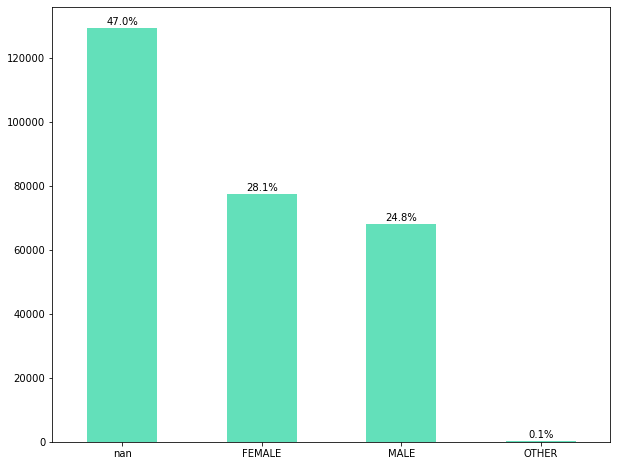

In [22]:
fig = plt.figure(figsize = (10,8))
users_all['gender'].value_counts(dropna=False).plot(kind='bar', color = '#63E0BA')
plt.xticks(rotation=0)
count = users_all['gender'].value_counts(dropna= False)

for i in range(len(count)):
    percentage = '{:0.1f}%'.format(count[i]/users_all.shape[0] * 100)
    plt.text(i,count[i]+1000,percentage,ha = 'center')

### Country_destination

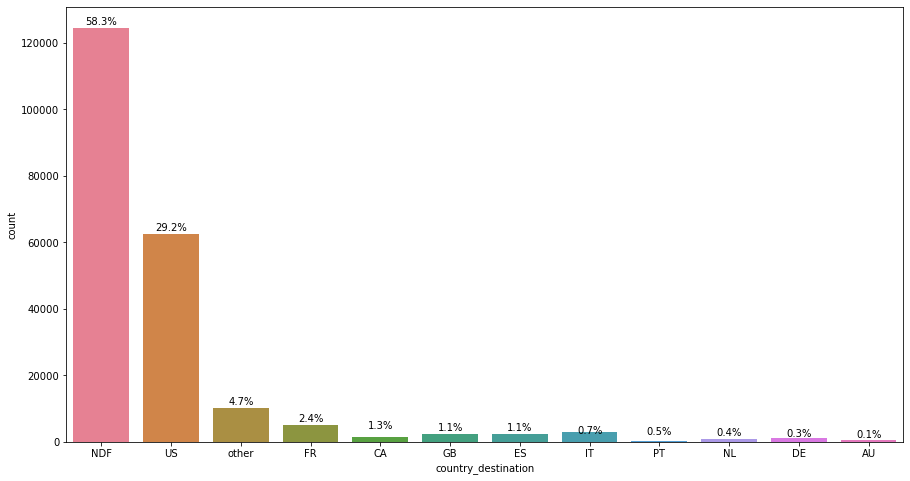

In [9]:
fig = plt.figure(figsize = (15,8))
sns.countplot(data = users_all, x = 'country_destination', palette = 'husl')
count = users_all['country_destination'].value_counts()

for i in range(len(count)):
    percentage = '{:0.1f}%'.format(count[i]/train_df.shape[0] * 100)
    plt.text(i,count[i]+1000,percentage,ha = 'center')

<AxesSubplot:xlabel='country_destination', ylabel='count'>

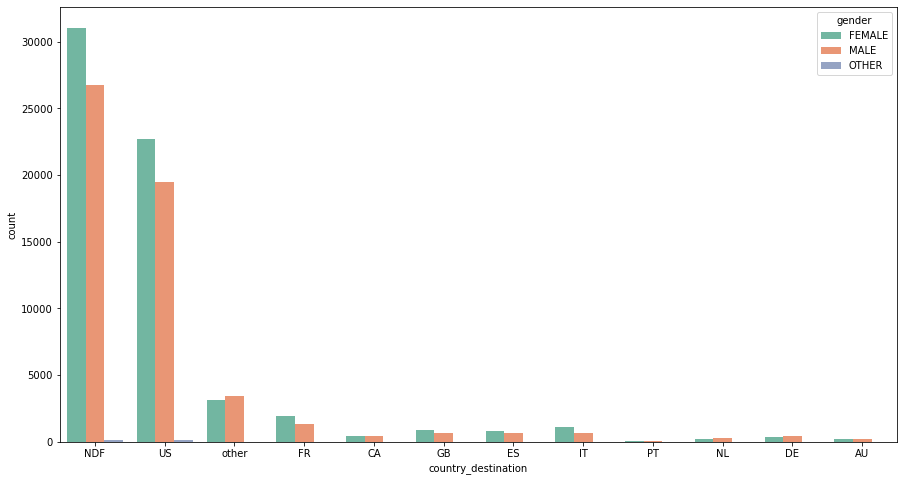

In [78]:
fig = plt.figure(figsize = (15,8))
sns.countplot(data = users_all, x = 'country_destination', hue = 'gender', palette='Set2')

There's no big difference between 2 main genders in choosing destination contry.

## Age

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

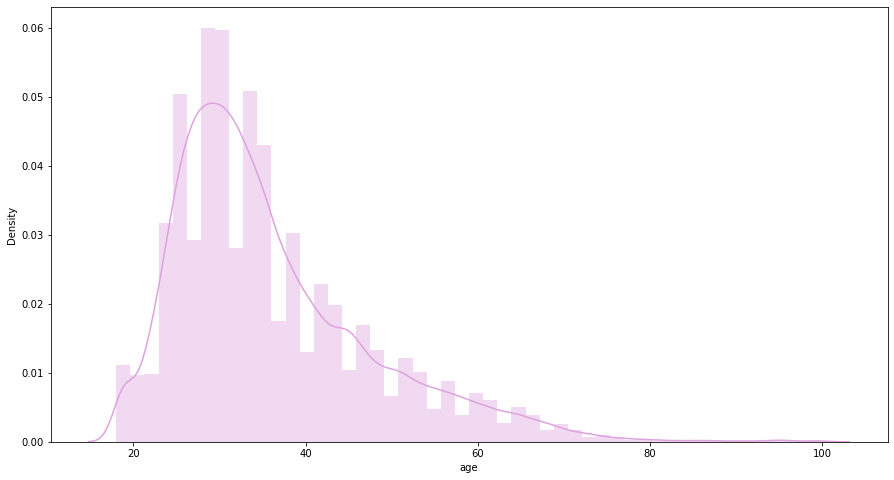

In [98]:
fig = plt.figure(figsize = (15,8))
sns.distplot(users_all['age'].dropna(), color='#dea2de')

In [205]:
users_all['age_range'] = pd.cut(users_all['age'], [0, 20, 40, 60, 80, 100])

<AxesSubplot:xlabel='country_destination', ylabel='count'>

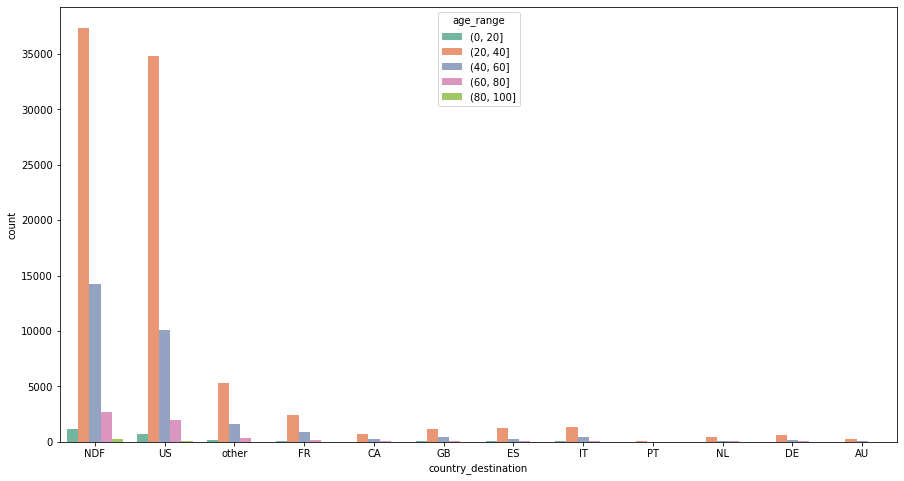

In [106]:
fig = plt.figure(figsize = (15,8))
sns.countplot(data = users_all, x = 'country_destination', hue = 'age_range', palette ='Set2')

## Signup_method

<AxesSubplot:xlabel='signup_method', ylabel='count'>

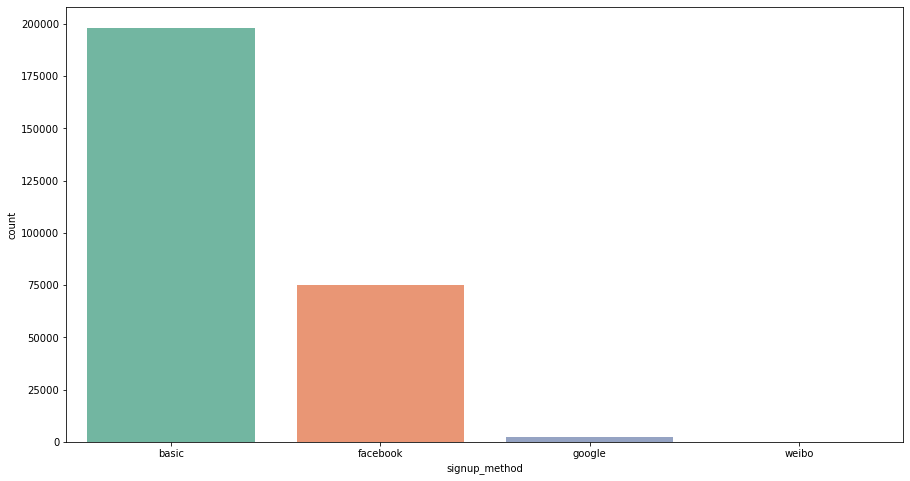

In [109]:
fig = plt.figure(figsize = (15,8))
sns.countplot(data = users_all, x = 'signup_method', palette='Set2')

## Affiliate_channel

<AxesSubplot:xlabel='affiliate_channel', ylabel='count'>

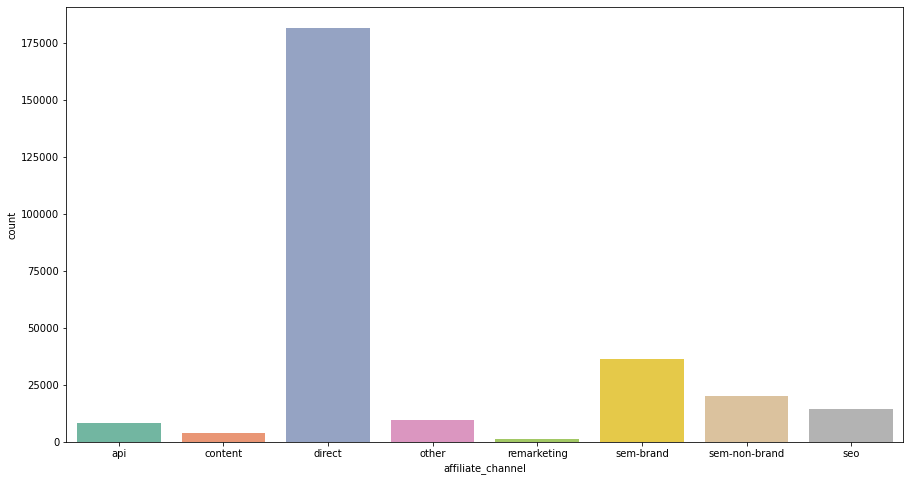

In [111]:
fig = plt.figure(figsize = (15,8))
sns.countplot(data = users_all, x = 'affiliate_channel', palette='Set2'

## Affiliate_provider

<AxesSubplot:xlabel='affiliate_provider', ylabel='count'>

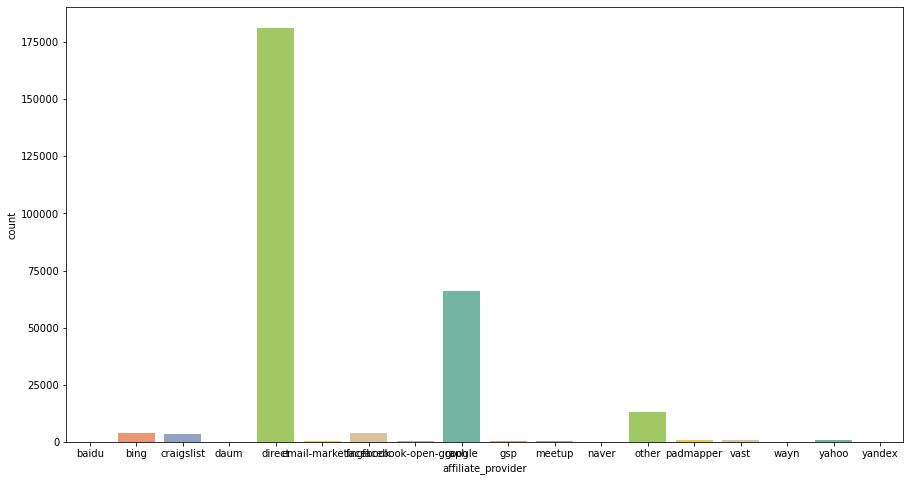

In [112]:
fig = plt.figure(figsize = (15,8))
sns.countplot(data = users_all, x = 'affiliate_provider', palette='Set2')

## First_device_type

<AxesSubplot:xlabel='first_device_type', ylabel='count'>

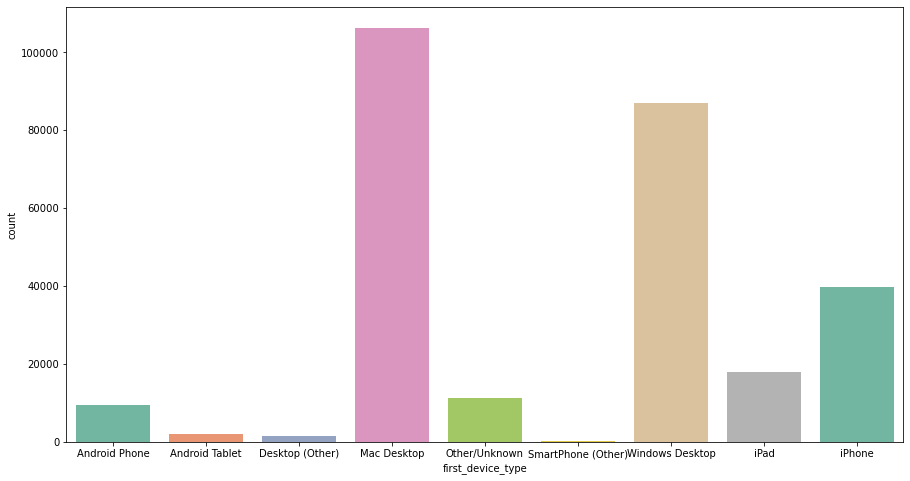

In [113]:
fig = plt.figure(figsize = (15,8))
sns.countplot(data = users_all, x = 'first_device_type', palette='Set2')

## Date

In [206]:
users_all['acc_year'] = users_all['date_account_created'].dt.year
users_all['acc_month'] = users_all['date_account_created'].dt.month
users_all['acc_day'] = users_all['date_account_created'].dt.day_name()

In [120]:
users_all.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_range,acc_year,acc_month,acc_day
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,2010,6,Monday
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,"(20.0, 40.0]",2011,5,Wednesday
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,"(40.0, 60.0]",2010,9,Tuesday
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,"(40.0, 60.0]",2011,12,Monday
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,"(40.0, 60.0]",2010,9,Tuesday


<AxesSubplot:xlabel='acc_day', ylabel='count'>

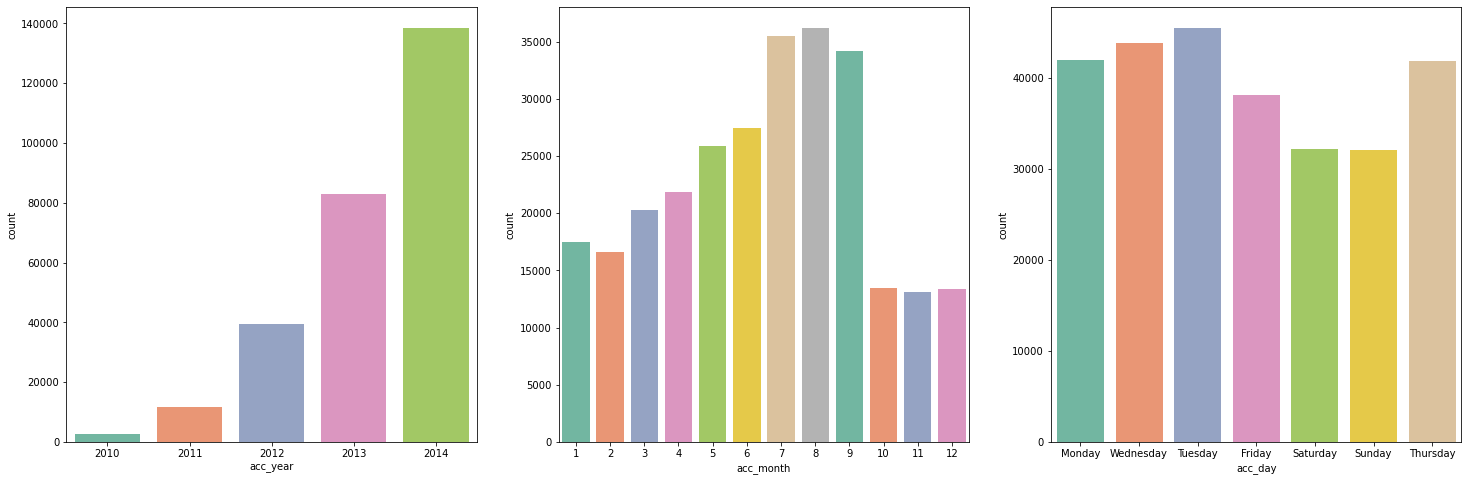

In [132]:
fig,ax = plt.subplots(nrows = 1, ncols = 3,figsize = (25,8))
sns.countplot(data = users_all, x = 'acc_year', palette='Set2', ax = ax[0])
sns.countplot(data = users_all, x = 'acc_month', palette='Set2', ax = ax[1])
sns.countplot(data = users_all, x = 'acc_day', palette='Set2', ax = ax[2])

<AxesSubplot:>

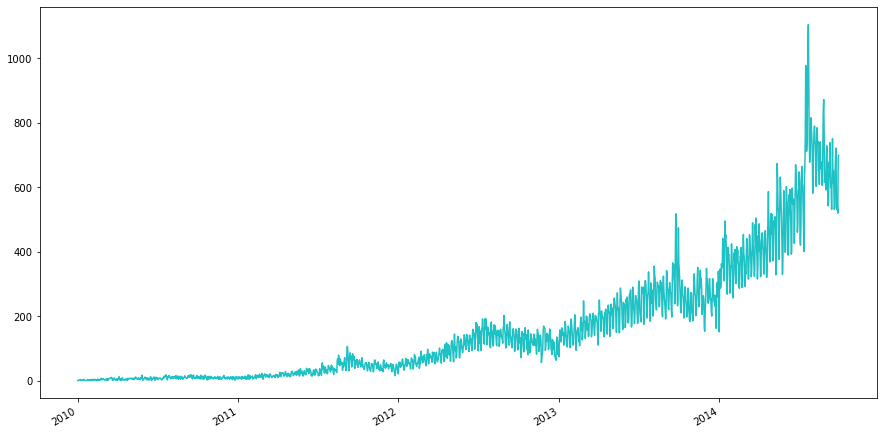

In [139]:
fig = plt.figure(figsize = (15,8))
users_all['date_account_created'].value_counts().plot(kind = 'line', color = '#1fc2c4')

## Data Processing

In [258]:
users_all['tfa_year'] = users_all['timestamp_first_active'].dt.year
users_all['tfa_month'] = users_all['timestamp_first_active'].dt.month
users_all['tfa_day'] = users_all['timestamp_first_active'].dt.dayofweek

In [260]:
users_all['acc_day'] = users_all['date_account_created'].dt.dayofweek
users_all = users_all.drop(['id','date_account_created','timestamp_first_active','date_first_booking','age_range'], axis = 1)

In [208]:
ohe_feats = ['gender', 'signup_method', 'language', 'affiliate_channel',
             'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
for f in ohe_feats:
    users_all_dummy = pd.get_dummies(users_all[f], prefix=f)
    users_all = users_all.drop([f], axis=1)
    users_all = pd.concat((users_all, users_all_dummy), axis=1)

In [261]:
users_all.head()

,age,signup_flow,country_destination,acc_year,acc_month,acc_day,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,...,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,tfa_year,tfa_month,tfa_day
0,NaN,0,7,2010,6,0,0,0,0,0,...,0,0,0,0,0,0,0,2009,3,3
1,38.0,0,7,2011,5,2,0,1,0,0,...,0,0,0,0,0,0,0,2009,5,5
2,56.0,3,10,2010,9,1,1,0,0,1,...,0,0,0,0,0,0,0,2009,6,1
3,42.0,0,11,2011,12,0,1,0,0,0,...,0,0,0,0,0,0,0,2009,10,5
4,41.0,0,10,2010,9,1,0,0,0,1,...,0,0,0,0,0,0,0,2009,12,1


In [265]:
average_age = users_all['age'].mean()
std_age = users_all['age'].std()
count_nan_age = users_all['age'].isnull().sum()

rand_age = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age)
users_all['age'][np.isnan(users_all['age'])] = rand_age
users_all['age'] = users_all['age'].astype(int)

<ipython-input-265-ea41852bb6ef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_all['age'][np.isnan(users_all['age'])] = rand_age


In [227]:
le = LabelEncoder()
le.fit(users_all['country_destination'].unique())
users_all['country_destination'] = le.transform(users_all['country_destination'])

In [267]:
X_train = users_all.loc[:(train_df.shape[0]-1)].drop('country_destination',axis = 1)
y_train = users_all.loc[:(train_df.shape[0]-1)]['country_destination']
X_test = users_all.loc[(train_df.shape[0]):].drop('country_destination',axis = 1)

## Modeling

### KNeighbors

In [268]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [269]:
knn_model.score(X_train, y_train)

0.9355636656656563

### RandomForest

In [270]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [271]:
rf_model.score(X_train, y_train)

0.9424926563942075

In [272]:
y_pred = rf_model.predict(X_test)

In [274]:
y_pred

array([10,  7,  7, ...,  7,  7, 10])

In [279]:
test_df['predicted_country_destination'] = le.inverse_transform(y_pred)

In [280]:
test_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,predicted_country_destination
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,US
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,NDF
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,NDF
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF
